In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations as config
from utils import plotUtils
from utils import dataframeUtil
from utils import modelUtils
from utils import simulaltionUtils
from tensorflow import keras
import keras.layers as layers
from matplotlib import pyplot as plt
import numpy as np
from random import randrange

Configuration report:
Number of Subgroups is: 28
The Trend Simulation Formel is: x*1.3+10


In [2]:
config.n= config.cnn_n
config.neuralInputsNumber = config.cnn_n
config.natural_trainDatasetName=config.cnn_natural_trainDatasetName
config.natural_testDatasetName=config.cnn_natural_testDatasetName
simulaltionUtils.testParam()
simulaltionUtils.simulateNaturalTrainAndTestData()

Configurations.natural_trainDatasetName
../dataset/cnn_natural_traindata.csv
Configurations.natural_testDatasetName
../dataset/cnn_natural_testdata.csv
Natural Charts Simulation is done..


In [2]:
# x_train,y_train,test_x,test_y = dataframeUtil.getTrainAndTestData(config.cnn_natural_trainDatasetName,config.cnn_natural_testDatasetName,1,config.cnn_n)
# print("Training input shape: ", x_train.shape)

x_train,y_train,test_x,test_y = dataframeUtil.getTrainAndTestData("../"+config.natural_trainDatasetName,"../"+config.natural_testDatasetName,1,config.n)
print("Training input shape: ", x_train.shape)

Training input shape:  (1000, 28)


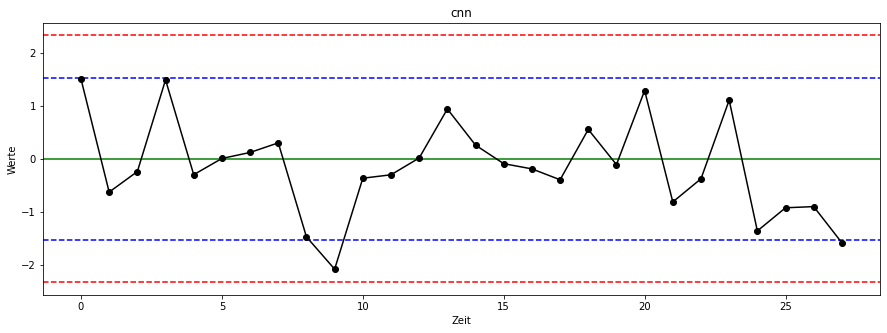

In [3]:
plotUtils.figsize=15
# x_slowChangesUp,y_slowChangesUp=plotUtils.plotRandomChartFrom_csv_with_1y(config.cnn_natural_trainDatasetName,"cnn")
x_slowChangesUp,y_slowChangesUp=plotUtils.plotRandomChartFrom_csv_with_1y("../"+config.natural_trainDatasetName,"cnn")

In [14]:
strides =1

model = keras.Sequential(
    [
        layers.Input(shape=(config.n,1 )),
        layers.Conv1D(
            filters=32, kernel_size=28, padding="same", strides=strides, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=28, padding="same", strides=strides, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=28, padding="same", strides=strides, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=28, padding="same", strides=strides, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=28, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 28, 32)            928       
                                                                 
 dropout_8 (Dropout)         (None, 28, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 28, 16)            14352     
                                                                 
 conv1d_transpose_12 (Conv1D  (None, 28, 16)           7184      
 Transpose)                                                      
                                                                 
 dropout_9 (Dropout)         (None, 28, 16)            0         
                                                                 
 conv1d_transpose_13 (Conv1D  (None, 28, 32)           14368     
 Transpose)                                           

In [15]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)
print("EVALUATION")
model.evaluate(test_x, test_x)

Epoch 1/50
8/8 [==============================] - 0s 29ms/step - loss: 0.8538 - val_loss: 0.5307
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 0.4337 - val_loss: 0.2318
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.2699 - val_loss: 0.1517
Epoch 4/50
8/8 [==============================] - 0s 19ms/step - loss: 0.2013 - val_loss: 0.1228
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 0.1688 - val_loss: 0.0894
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.1393 - val_loss: 0.0651
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.1229 - val_loss: 0.0496
Epoch 8/50
8/8 [==============================] - 0s 18ms/step - loss: 0.1099 - val_loss: 0.0406
Epoch 9/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0993 - val_loss: 0.0347
Epoch 10/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0945 - val_loss: 0.0316
Epoch 11/50
8/8 [============

0.017575280740857124

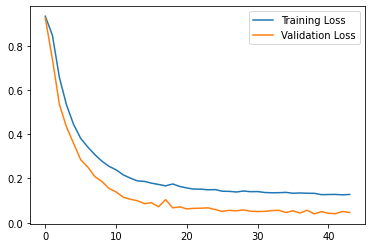

In [10]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

(1000, 28, 1)


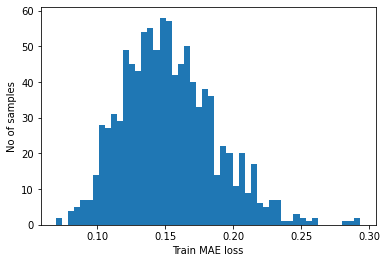

Reconstruction error threshold:  0.29353157214309494


In [11]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
print(x_train_pred.shape)
#train_mae_loss = np.mean(np.abs(x_train_pred - x_train.reshape(1000,28,1)), axis=1)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train.reshape(x_train_pred.shape)), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

(7,) (7,)


<AxesSubplot:xlabel='Zeit', ylabel='Werte'>

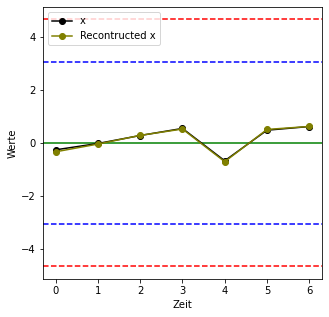

In [13]:
print(x_train[0].shape,x_train_pred[0].reshape(x_train[0].shape).shape)
plotUtils.plot2Chart(x_train[0],x_train_pred[0].reshape(x_train[0].shape),"")

In [16]:
#x_test,y_test=plotUtils.plotRandomChartFrom_csv_with_1y("../"+config.test,config.slowChangesUpChartPlotTitle)
x, y, x_test, y_test = modelUtils.getTrainAndTestData()


[[4.3370588]]
not normal
['Trend up']


<AxesSubplot:xlabel='Zeit', ylabel='Werte'>

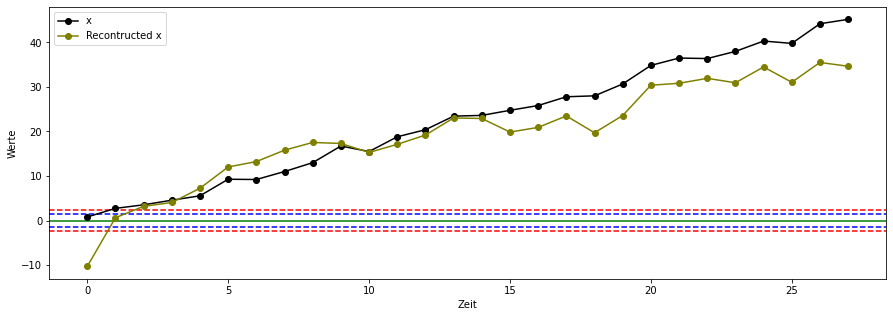

In [30]:
a = randrange(0,len(x_test))
b = a+1
x_train_pred = model.predict(x_test[a:b])
train_mae_loss = np.mean(np.abs(x_train_pred - x_test[a:b].reshape(x_train_pred.shape)), axis=1)
print(train_mae_loss)
print("normal" if train_mae_loss<threshold else "not normal")
print(modelUtils.getDetectionLabel_for_4y(y_test[a:b]))
plotUtils.plot2Chart(x_test[a:b][0],x_train_pred[0].reshape(x_train[0].shape),"")